In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import numpy as np
from matplotlib import rc

plt.rc('font',family='NanumGothic')
print(plt.rcParams['font.family'])
print(matplotlib.matplotlib_fname())

df = pd.read_csv("./치매현황.csv", encoding="cp949")
print(matplotlib.get_cachedir())

df.shape


['NanumGothic']
C:\Users\Revo\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\mpl-data\matplotlibrc
C:\Users\Revo\.matplotlib


(13740, 20)

In [2]:
df.columns

Index(['시점', '행정구역(시도)별', '행정구역(기초)별', '성별', '연령별', '노인인구수', '치매환자수',
       '치매환자유병률', '최경도 환자', '경도 환자', '중등도 환자', '중증 환자', '알츠하이머 환자수',
       '알츠하이머 환자유병률', '혈관성치매 환자수', '혈관성치매 환자유병률', '기타 환자환자수', '기타 환자유병률',
       '경도인지장애 환자수', '경도인지장애 환자유병률'],
      dtype='object')

In [3]:
data = df[["시점", "행정구역(시도)별", "성별", "연령별", "치매환자수", "중증 환자"]]

data

,시점,행정구역(시도)별,성별,연령별,치매환자수,중증 환자
0,2020,전국,전체,60~64세,23350.26,3619.29
1,2020,전국,전체,65~69세,36620.52,5676.18
2,2020,전국,전체,70~74세,77236.58,11971.67
3,2020,전국,전체,75~79세,189626.57,29392.12
4,2020,전국,전체,80~84세,232892.50,36098.34
...,...,...,...,...,...,...
13735,2021,제주특별자치도,여,75~79세,532.92,82.60
13736,2021,제주특별자치도,여,80~84세,778.05,120.60
13737,2021,제주특별자치도,여,85세이상,1134.00,175.77
13738,2021,제주특별자치도,여,60세이상,2645.05,409.98


## 년도별 환자 데이터 나누기

In [4]:
df2020 = data.loc[(data["시점"] == 2020) & (data["행정구역(시도)별"] == df["행정구역(기초)별"]) & (data["연령별"] == "60세이상") & (data["성별"] == "전체")]
df2021 = data.loc[(data["시점"] == 2021) & (data["행정구역(시도)별"] == df["행정구역(기초)별"]) & (data["연령별"] == "60세이상") & (data["성별"] == "전체")]
df2022 = data.loc[(data["시점"] == 2022) & (data["행정구역(시도)별"] == df["행정구역(기초)별"]) & (data["연령별"] == "60세이상") & (data["성별"] == "전체")]

df2022

,시점,행정구역(시도)별,성별,연령별,치매환자수,중증 환자
6700,2022,서울특별시,전체,60세이상,159334.0,24697.0
6722,2022,부산광역시,전체,60세이상,66492.0,10306.0
6744,2022,대구광역시,전체,60세이상,43479.0,6739.0
6766,2022,인천광역시,전체,60세이상,45425.0,7041.0
6788,2022,광주광역시,전체,60세이상,23358.0,3621.0
6810,2022,대전광역시,전체,60세이상,23652.0,3666.0
6832,2022,울산광역시,전체,60세이상,13749.0,2131.0
6854,2022,세종특별자치시,전체,60세이상,3893.0,603.0
6876,2022,경기도,전체,60세이상,201528.0,31237.0
6898,2022,강원도,전체,60세이상,37659.0,5837.0


## 행정구역별 치매 환자 수 구하기

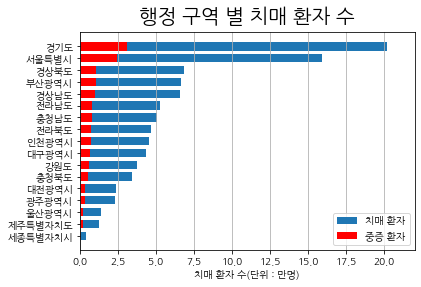

In [5]:
df1 = df2022[["행정구역(시도)별", "치매환자수", "중증 환자"]]
df1 = df1.sort_values(by = "치매환자수", ascending=True)
df1["치매환자수"] = (df1["치매환자수"]) / 10000
df1["중증 환자"] = (df1["중증 환자"]) / 10000
xs = df1["행정구역(시도)별"].to_list()
idx = np.arange(len(xs))

plt.xlabel('치매 환자 수(단위 : 만명)')
plt.xlim(0, 22)
plt.grid(True, axis="x")
plt.yticks(idx, xs)  

title_font = {
    'fontsize' : 20,
    'fontweight': 'bold'
}
plt.title("행정 구역 별 치매 환자 수", fontdict=title_font, pad=10)
plt.barh(idx, df1["치매환자수"], height=0.7, label="치매 환자")
plt.barh(idx, df1["중증 환자"], color='red', height=0.7, label="중증 환자")      
plt.legend(loc = 'lower right')

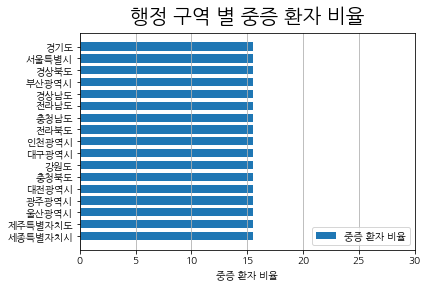

In [6]:
p = df2022["중증 환자"] * 100 / df2022["치매환자수"]

xs = df1["행정구역(시도)별"].to_list()
idx = np.arange(len(xs))

plt.xlabel('중증 환자 비율')
plt.xlim(0, 30)
plt.grid(True, axis="x")
plt.yticks(idx, xs)  

title_font = {
    'fontsize' : 20,
    'fontweight': 'bold'
}

plt.title("행정 구역 별 중증 환자 비율", fontdict=title_font, pad=10)
plt.barh(idx, p, height=0.7, label="중증 환자 비율")    
plt.legend(loc = 'lower right')

<function matplotlib.pyplot.show(close=None, block=None)>

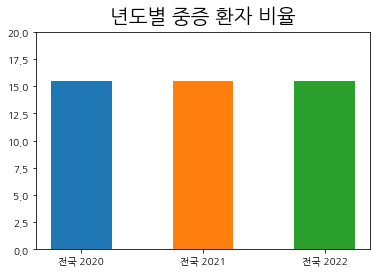

In [7]:
p2020 = np.mean(df2020["중증 환자"] * 100 / df2020["치매환자수"])
p2021 = np.mean(df2021["중증 환자"] * 100 / df2021["치매환자수"])
p2022 = np.mean(df2022["중증 환자"] * 100 / df2022["치매환자수"])

xs = ["전국 2020", "전국 2021", "전국 2022"]
idx = np.arange(len(xs))
plt.ylim(0, 20)

plt.bar(xs[0], p2020, width=0.5)
plt.bar(xs[1], p2021, width=0.5)
plt.bar(xs[2], p2022, width=0.5)

plt.title("년도별 중증 환자 비율", fontdict=title_font, pad=10)

plt.show